In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

% data file must be in same location that jupyter was launched

In [3]:
df = pd.read_table('MULTIVAR_FIG5-2.DAT')

In [4]:
df.index = df.index + 1

In [5]:
df.head()

,X1,X2,X3
1,59.31,7.44,1.472
2,57.63,5.21,2.027
3,60.25,5.59,10.879
4,61.69,5.98,9.562
5,63.19,7.86,15.802


<br>

# <font size=12>#1</font>

## <center><b>1. Make 3 plots and examine the correlation among the variables </b></center>

Text(0.5,1,'X3 vs X1')

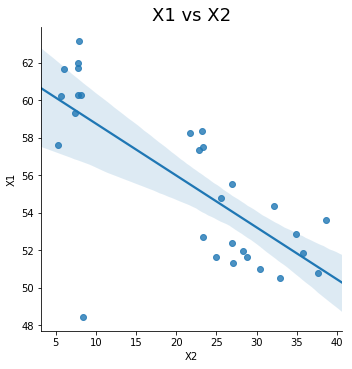

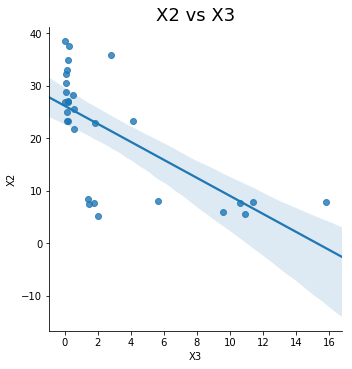

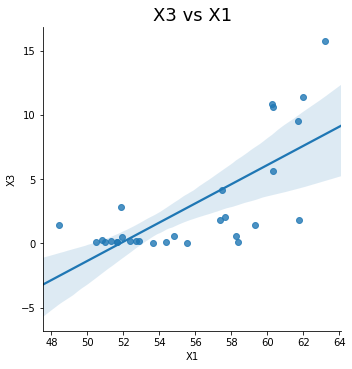

In [6]:
sns.lmplot(x='X2', y='X1', data=df)
plt.title('X1 vs X2', fontsize=18)

sns.lmplot(x='X3', y='X2', data=df)
plt.title('X2 vs X3', fontsize=18)

sns.lmplot(x='X1', y='X3', data=df)
plt.title('X3 vs X1', fontsize=18)

In [7]:
df.corr()

,X1,X2,X3
X1,1.000000,-0.730873,0.726121
X2,-0.730873,1.000000,-0.668808
X3,0.726121,-0.668808,1.000000


<br>

## <center><b>2. Compute the normalized variables (Z1,Z2,Z3) corresponding to X1,X2,X3 respectively </b></center>

In [8]:
mu1 = np.mean(df['X1'])
mu2 = np.mean(df['X2'])
mu3 = np.mean(df['X3'])

In [9]:
var1 = np.var(df['X1'])
var2 = np.var(df['X2'])
var3 = np.var(df['X3'])


In [10]:
z1 = pd.Series(df['X1'].apply(lambda x: (x-mu1)/var1), name='z1')
z2 = pd.Series(df['X2'].apply(lambda x: (x-mu2)/var2), name='z2')
z3 = pd.Series(df['X3'].apply(lambda x: (x-mu3)/var3), name='z3')


In [11]:
"""concat joins the 3 series together to make the Z table, and as_matrix
converts to a 2D array for matrix operations"""

Z = pd.concat([z1,z2,z3], axis=1).as_matrix()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [12]:
print('Z')
print(Z)

Z
[[ 0.20911769 -0.11318496 -0.07416021]
 [ 0.11351655 -0.13140171 -0.04433565]
 [ 0.26260881 -0.12829751  0.43135259]
 [ 0.34455265 -0.12511162  0.36057973]
 [ 0.42991082 -0.109754    0.69590447]
 [ 0.36219334 -0.11008076  0.46015613]
 [ 0.34796698 -0.11065259 -0.05717902]
 [ 0.26602314 -0.11089766  0.41732699]
 [ 0.26602314 -0.10754839  0.15057186]
 [-0.40944448 -0.10509771 -0.07652468]
 [-0.16759634  0.01621113 -0.14358963]
 [-0.18523703  0.04659961 -0.14385832]
 [-0.29221927  0.09536821 -0.14724381]
 [-0.27457858  0.1334355  -0.14079526]
 [-0.07142614  0.0892415  -0.14874847]
 [ 0.09929019  0.01253511 -0.05422343]
 [ 0.14879792  0.00387602 -0.12284678]
 [ 0.10611884  0.01670127  0.06921261]
 [ 0.15619563  0.01580268 -0.14520177]
 [-0.11410523  0.14127768 -0.15116668]
 [-0.15678431  0.11121596 -0.14385832]
 [-0.21368975  0.11832295 -0.00242006]
 [-0.21027543  0.05681079 -0.12703834]
 [-0.0469568   0.03524477 -0.12408276]
 [-0.22791611  0.03009834 -0.1470826 ]
 [-0.22791611  0.061058

<br>

## <center><b>3. Compute covariance matrix   $C=\frac{Z^{T}Z}{(n-1)}$ </b></center>

In [13]:
Z_T = np.transpose(Z)

In [14]:
C = np.matmul(Z_T,Z) / (len(Z)-1)

In [15]:
print('C')
print(C)

C
[[ 0.05893778 -0.01632082  0.04158786]
 [-0.01632082  0.00846069 -0.01451326]
 [ 0.04158786 -0.01451326  0.05565715]]


<br>

In [16]:
## numpy also has a built in function to get the same result

In [17]:
np.cov(Z, rowvar=False)

array([[ 0.05893778, -0.01632082,  0.04158786],
       [-0.01632082,  0.00846069, -0.01451326],
       [ 0.04158786, -0.01451326,  0.05565715]])

<br>

## <center><b>4. Perform SVD of the covariance matrix and compute the principle components.<br><br>How many are necessary to preserve at least 90% of the variance in the original data?</b></center>

In [18]:
U, s, vh = np.linalg.svd(C)

<br>

In [19]:
print('U')
print(U)

U
[[-0.7042502  -0.67914693  0.20686009]
 [ 0.22291412  0.06510745  0.97266146]
 [-0.67404818  0.73110906  0.1055395 ]]


<br>

In [20]:
print('vh')
print(vh)

vh
[[-0.7042502   0.22291412 -0.67404818]
 [-0.67914693  0.06510745  0.73110906]
 [ 0.20686009  0.97266146  0.1055395 ]]


<br>

In [21]:
print('s')
print(s)

s
[0.1039081  0.01573262 0.0034149 ]


<br>

In [22]:
eigval,eigvector = np.linalg.eig(C)
print('Eigenvalues:', eigval)
print('\b')
print('Eigenvectors:')
print(eigvector)

Eigenvalues: [0.1039081  0.01573262 0.0034149 ]

Eigenvectors:
[[ 0.7042502  -0.67914693  0.20686009]
 [-0.22291412  0.06510745  0.97266146]
 [ 0.67404818  0.73110906  0.1055395 ]]


<br>

In [23]:
total = np.sum(s)

In [24]:
print('\b')
print('PC1 represents', round(s[0]/total*100,2),'%')
print('\b')
print('PC1 + PC2 represents', round((s[0]+s[1])/total*100,2),'%')
print('\b')


PC1 represents 84.44 %

PC1 + PC2 represents 97.22 %



<br>

## <center><b>5.  Plot PC2 versus PC1 and compute the variances along each axis</b></center>

In [25]:
V1 = eigvector[:,0].reshape(3,1)
V2 = eigvector[:,1].reshape(3,1)

In [26]:
PC1 = np.matmul(Z,V1)
PC2 = np.matmul(Z,V2)
PrinComps = pd.DataFrame(np.concatenate([PC1,PC2], axis=1), columns=['PC1','PC2'])

In [27]:
PrinComps

,PC1,PC2
0,0.122514,-0.203610
1,0.079351,-0.118064
2,0.504294,0.128663
3,0.513589,0.021476
4,0.796304,0.209664
5,0.589781,0.083275
6,0.231180,-0.285329
7,0.493366,0.117222
8,0.312814,-0.077587
9,-0.316505,0.215282


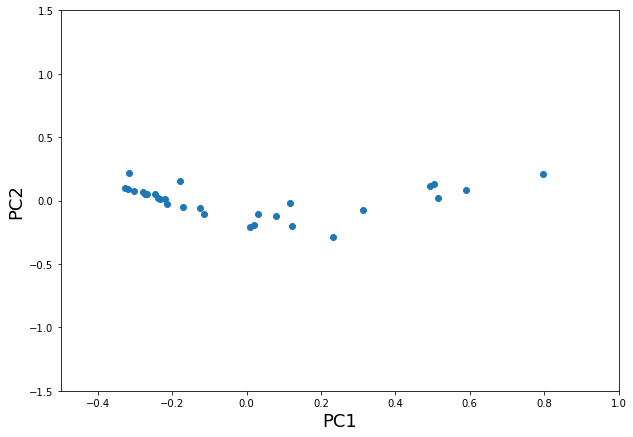

In [28]:
fig,axes = plt.subplots(figsize=(10,7))
axes.set_xlabel('PC1',fontsize=18)
axes.set_ylabel('PC2', fontsize=18)
axes.set_xlim(left=-0.5,right=1)
axes.set_ylim(bottom=-1.5,top=1.5)
plt.scatter(x=PC1, y=PC2)

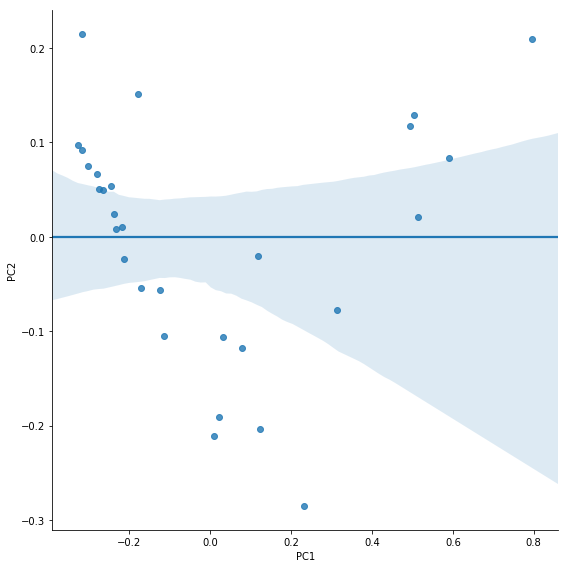

In [29]:
sns.lmplot(x='PC1', y='PC2', data=PrinComps, height=8)

In [30]:
print('The variance along PC1 axis is',np.var(PC1))
print('\b')
print('The variance along PC2 axis is',np.var(PC2))


The variance along PC1 axis is 0.1003250668089225

The variance along PC2 axis is 0.015190116910312485


<br>

# <font size=12>#2</font>

## <center><b>Using the principle components, perform K-mean clustering and divide the data </b></center>

In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=2)

In [33]:
kmeans.fit(PrinComps)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
kmeans.labels_

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [35]:
PrinComps['Cluster'] = pd.Series(kmeans.labels_)

In [36]:
PrinComps.head()

,PC1,PC2,Cluster
0,0.122514,-0.203610,1
1,0.079351,-0.118064,1
2,0.504294,0.128663,0
3,0.513589,0.021476,0
4,0.796304,0.209664,0


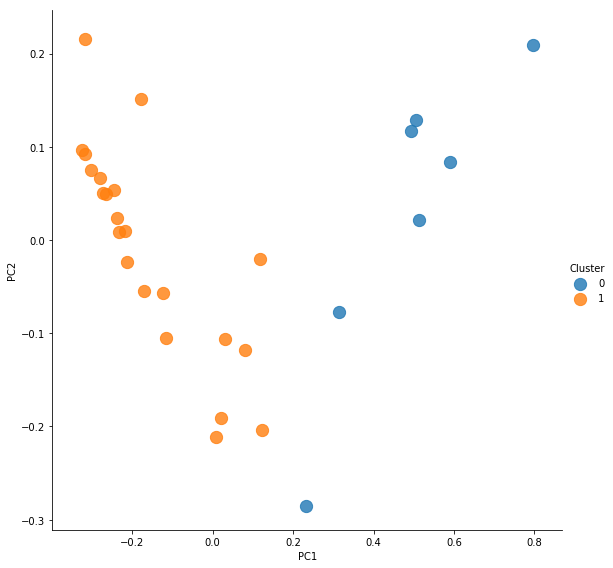

In [37]:
sns.lmplot(x='PC1', y='PC2', data=PrinComps, height=8,hue='Cluster', fit_reg=False, scatter_kws={"s": 150})